# K-means Clustering 
_________________________________
* Aayush Malde( 1911090 )
* Aditya Malwade ( 1911091 )
* Rahul Panchal ( 1911097 )

In [ ]:
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import datetime
import math

In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv',encoding= 'unicode_escape')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
dataset.shape

(541909, 8)

# **Data Analysis and Visualization**

# **Preprocessing**

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
dataset.shape

(406829, 8)

In [ ]:
# Total price
dataset['Amount'] = dataset['Quantity'] * dataset['UnitPrice']

In [ ]:
# Grouping
# Monetary
monetary = dataset.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# Frequency
frequency = dataset.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
mf = monetary.merge(frequency, on = "CustomerID", how = "inner")
mf.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# Recency
maximum = max(dataset.InvoiceDate)
print(maximum)
minimum = min(dataset.InvoiceDate)
print(minimum)
maximum = maximum + pd.DateOffset(days = 1)
dataset['diff'] = maximum - dataset.InvoiceDate
dataset.head()

2011-12-09 12:50:00
2010-12-01 08:26:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [ ]:
print(maximum)

2011-12-10 12:50:00


In [ ]:
recency = dataset.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [ ]:
#Combining all recency, frequency and monetary parameters
RFM = mf.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Monetary','Frequency','Recency']
RFM.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4372 non-null   float64        
 1   Monetary    4372 non-null   float64        
 2   Frequency   4372 non-null   int64          
 3   Recency     4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [ ]:
# Outlier treatment
Q1 = RFM.Monetary.quantile(0.25)
Q3 = RFM.Monetary.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Monetary >= Q1 - 1.5*IQR) & (RFM.Monetary <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [ ]:
RFM.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
5,12352.0,1545.41,95,36 days 22:13:00


In [ ]:
RFM.shape

(3697, 4)

In [ ]:
# standardisation
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [ ]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Monetary','Recency']
RFM_norm1.head()

,Frequency,Monetary,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


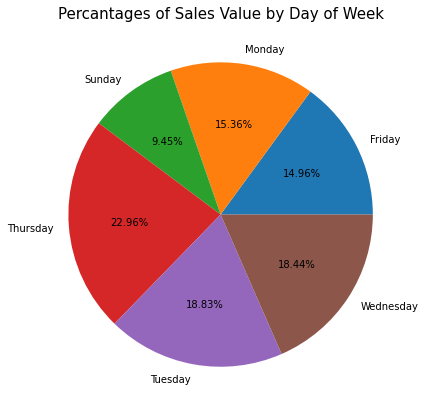

In [ ]:
# to see the sales value for each day of the week.
dataset['FinalPrice'] = dataset['Quantity']*dataset['UnitPrice']
dataset['Day of week'] = dataset['InvoiceDate'].dt.day_name()
dataset.groupby('Day of week')['FinalPrice'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

# **Customer segmentation**
# Recency vs Monetary

In [ ]:
Rfm1  = RFM_norm1[['Recency','Monetary']] 

In [ ]:
# Silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
g1 = []
for k in range(2,7):
  kmeans = KMeans(n_clusters=k).fit(Rfm1)
  sc = silhouette_score(Rfm1, kmeans.labels_)
  print('Silhouette score for', k, 'clusters =', sc)
  g1.append([k,sc])


Silhouette score for 2 clusters = 0.4606290802321409
Silhouette score for 3 clusters = 0.5210914416328208
Silhouette score for 4 clusters = 0.4489167750885875
Silhouette score for 5 clusters = 0.43214072548431337
Silhouette score for 6 clusters = 0.4428834098406636


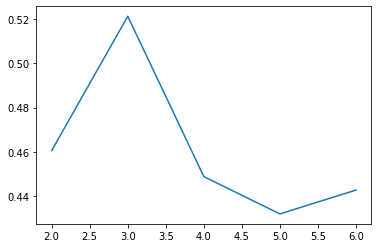

In [ ]:
plt.plot(pd.DataFrame(g1)[0], pd.DataFrame(g1)[1])

In [ ]:
# So we do kmeans with n_clusters = 3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(Rfm1)

KMeans(n_clusters=3)

In [ ]:
centroids = model_clus3.cluster_centers_
centroids

array([[-0.48602645, -0.39357846],
       [ 1.4914125 , -0.60876364],
       [-0.57984972,  1.55850425]])

In [ ]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_rm = pd.concat([RFM, pd.Series(model_clus3.labels_)], axis=1)
RFM_rm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency', 'ClusterID']
RFM_rm.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,326 days 02:33:00,1
1,12348.0,1797.24,31,75 days 23:37:00,0
2,12349.0,1757.55,73,19 days 02:59:00,2
3,12350.0,334.40,17,310 days 20:49:00,1
4,12352.0,1545.41,95,36 days 22:13:00,2


In [ ]:
RFM_rm['Days'] = RFM['Recency'].dt.days
RFM_rm.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID,Days
0,12346.0,0.00,2,326 days 02:33:00,1,326
1,12348.0,1797.24,31,75 days 23:37:00,0,75
2,12349.0,1757.55,73,19 days 02:59:00,2,19
3,12350.0,334.40,17,310 days 20:49:00,1,310
4,12352.0,1545.41,95,36 days 22:13:00,2,36


In [ ]:
u_labels = RFM_rm.ClusterID.unique()
u_labels

array([1, 0, 2], dtype=int32)

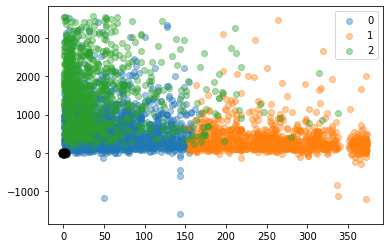

In [ ]:
#plotting the results:
label = list(RFM_rm['ClusterID'])

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(RFM_rm.loc[RFM_rm['ClusterID'] == i , 'Days'] , RFM_rm.loc[RFM_rm['ClusterID'] == i , 'Monetary'], label = i, alpha=0.4)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
RFM_rm.Recency = RFM_rm.Recency.dt.days
rm_clusters_monetary = pd.DataFrame(RFM_rm.groupby(["ClusterID"]).Monetary.mean())
rm_clusters_frequency = pd.DataFrame(RFM_rm.groupby(["ClusterID"]).Frequency.mean())
rm_clusters_recency = pd.DataFrame(RFM_rm.groupby(["ClusterID"]).Recency.mean())

In [ ]:
df = pd.concat([pd.Series([0,1,2]), rm_clusters_monetary, rm_clusters_frequency, rm_clusters_recency], axis=1)
df.columns = ["ClusterID", "Monetary_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Monetary_mean,Frequency_mean,Recency_mean
0,0,1579.749414,111.551643,44.117371
1,1,357.290738,21.272919,259.057956
2,2,615.355466,30.203059,53.829641


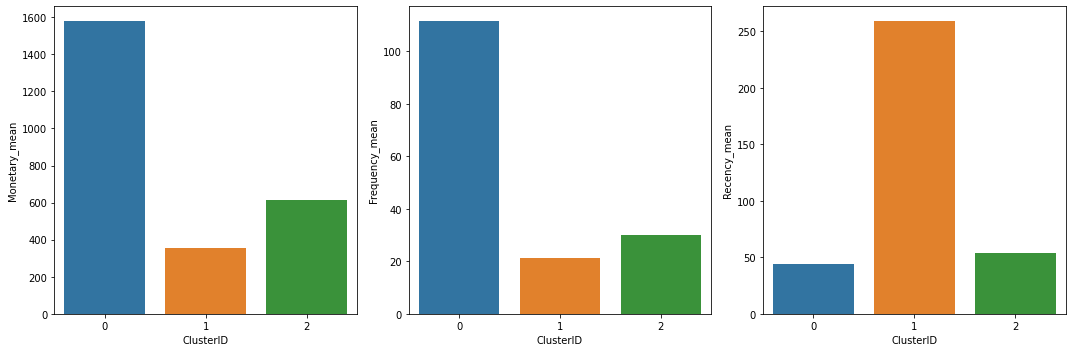

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Monetary_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

# **Cluster Segmentation**
# Frequency vs Monetary

In [ ]:
Rfm2  = RFM_norm1[['Frequency','Monetary']] # Important

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
g1 = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k).fit(Rfm2)
  sc = silhouette_score(Rfm2, kmeans.labels_)
  print('Silhouette score for', k, 'clusters =', sc)
  g1.append([k,sc])

Silhouette score for 2 clusters = 0.5940685890081692
Silhouette score for 3 clusters = 0.5069524949795076
Silhouette score for 4 clusters = 0.46829044765182903
Silhouette score for 5 clusters = 0.44581782757915356
Silhouette score for 6 clusters = 0.4173742054940072
Silhouette score for 7 clusters = 0.4125861403644662
Silhouette score for 8 clusters = 0.41638968410574057
Silhouette score for 9 clusters = 0.42107894630799886
Silhouette score for 10 clusters = 0.4307361926899672
Silhouette score for 11 clusters = 0.41999111398624367
Silhouette score for 12 clusters = 0.3868014078908484
Silhouette score for 13 clusters = 0.38492914336632317
Silhouette score for 14 clusters = 0.38532883494302356


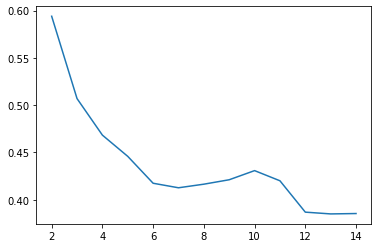

In [ ]:
plt.plot(pd.DataFrame(g1)[0], pd.DataFrame(g1)[1])

In [ ]:
# So we do kmeans with n_clusters = 2
kmeansmodel = KMeans(n_clusters = 2)
kmeansmodel.fit(Rfm2)

KMeans(n_clusters=2)

In [ ]:
centroids = kmeansmodel.cluster_centers_
centroids

array([[-0.43548691, -0.46011147],
       [ 1.29942162,  1.37289727]])

In [ ]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_copy = pd.concat([RFM, pd.Series(kmeansmodel.labels_)], axis=1)
RFM_copy.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency', 'ClusterID']
RFM_copy.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,326 days 02:33:00,0
1,12348.0,1797.24,31,75 days 23:37:00,1
2,12349.0,1757.55,73,19 days 02:59:00,1
3,12350.0,334.40,17,310 days 20:49:00,0
4,12352.0,1545.41,95,36 days 22:13:00,1


In [ ]:
u_labels = RFM_copy.ClusterID.unique()
u_labels

array([0, 1], dtype=int32)

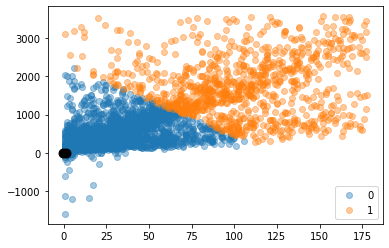

In [ ]:
#plotting the results:
label = list(RFM_copy['ClusterID'])

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(RFM_copy.loc[RFM_copy['ClusterID'] == i , 'Frequency'] , RFM_copy.loc[RFM_copy['ClusterID'] == i , 'Monetary'], label = i, alpha=0.4)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
RFM_copy.Recency = RFM_copy.Recency.dt.days
rfm_clusters_monetary = pd.DataFrame(RFM_copy.groupby(["ClusterID"]).Monetary.mean())
rfm_clusters_frequency = pd.DataFrame(RFM_copy.groupby(["ClusterID"]).Frequency.mean())
rfm_clusters_recency = pd.DataFrame(RFM_copy.groupby(["ClusterID"]).Recency.mean())

In [ ]:
df2 = pd.concat([pd.Series([0,1]), rfm_clusters_monetary, rfm_clusters_frequency, rfm_clusters_recency], axis=1)
df2.columns = ["ClusterID", "Monetary_mean", "Frequency_mean", "Recency_mean"]
df2.head()

,ClusterID,Monetary_mean,Frequency_mean,Recency_mean
0,0,448.024525,27.411573,123.220615
1,1,1730.623992,103.757511,48.057940


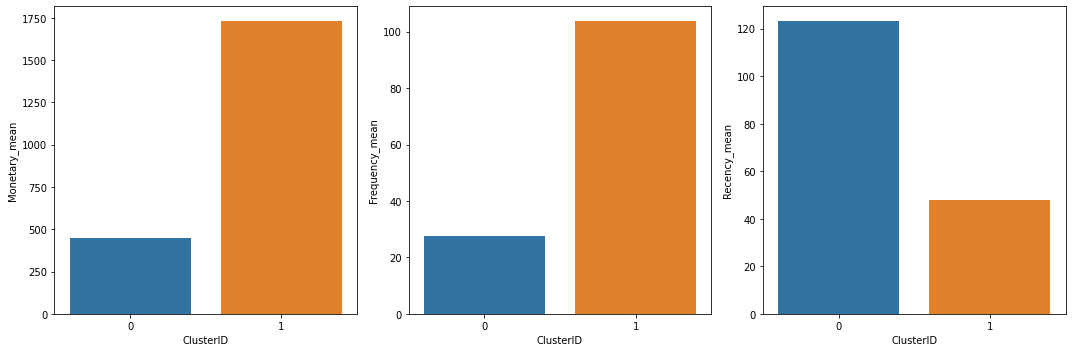

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df2.ClusterID, y=df2.Monetary_mean, ax = axs[0])
sns.barplot(x=df2.ClusterID, y=df2.Frequency_mean, ax = axs[1])
sns.barplot(x=df2.ClusterID, y=df2.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

# **Cluster Analysis**

In [ ]:
cluster_centers = dict()
X = RFM_norm1

for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}})

In [ ]:
feature_vector = ['Frequency','Monetary','Recency']
for i in range(2,11):
    print('\nFor {} clusters:'.format(i))
    cent_transformed=standard_scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(cent_transformed,columns=feature_vector))
    print('\nThe silhouette score for cluster {} is {}'.format(i,cluster_centers[i]['silhouette_score']))


For 2 clusters:
     Frequency   Monetary     Recency
0  1619.227647  97.607143   43.028388
1   415.943487  25.300576  129.945489

The silhouette score for cluster 2 is 0.42929467976639346

For 3 clusters:
     Frequency    Monetary     Recency
0   327.627231   20.678974  255.638974
1  1844.383415  109.586294   44.600254
2   557.869024   34.115305   52.276112

The silhouette score for cluster 3 is 0.43933529055238923

For 4 clusters:
     Frequency    Monetary     Recency
0  1107.920857   84.268116   51.028986
1   328.084409   20.451613  260.143011
2  2464.467410  117.521164   38.478836
3   446.946652   25.162076   55.582960

The silhouette score for cluster 4 is 0.40851721359807264

For 5 clusters:
     Frequency    Monetary     Recency
0  2471.402482  117.888283   38.198910
1   913.381223  113.945652   53.975543
2   327.037096   20.558856  262.393839
3   356.620667   23.335772   57.585955
4  1200.908456   53.513120   50.112245

The silhouette score for cluster 5 is 0.389142338346960